<a href="https://colab.research.google.com/github/kratiagarwalds/Kmeans_clustering-and-Data_visualization/blob/main/Data_Visualization_and_Kmeans_clustering_on_Exams_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import json
from pandas.io.json import json_normalize
from ast import literal_eval

In [45]:
#fetching data and converting it to a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/kratiagarwalds/Projects-Data/main/exams.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [46]:
df_1 = df.copy()

In [47]:
#checking for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [48]:
#getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:
#creating function to convert gender values to int type
print(df['gender'].value_counts())
def gender_to_num(srs):
    if srs=="male":
        return 1
    else:
        return 0
df["gender"] = df["gender"].apply(gender_to_num)
print(df['gender'].value_counts())

male      508
female    492
Name: gender, dtype: int64
1    508
0    492
Name: gender, dtype: int64


In [50]:
#creating function to convert lunch values to int type
print(df['lunch'].value_counts())
def lunch_to_int(srs):
    if srs == "standard":
        return 1
    else:
        return 0
df['lunch'] = df["lunch"].apply(lunch_to_int)
print(df['lunch'].value_counts())

standard        660
free/reduced    340
Name: lunch, dtype: int64
1    660
0    340
Name: lunch, dtype: int64


In [51]:
#creating function to disguish parent's education based on whether they have done only high school or studied more
print(df['parental level of education'].value_counts())
def parent_education(x):
    if x == "some college":
        return 1
    if x == "high school":
        return 0
    if x == "associate's degree":
        return 1
    if x == "some high school":
        return 0
    if x == "bachelor's degree":
        return 1
    if x == "master's degree":
        return 1
df['parental level of education']=df['parental level of education'].apply(parent_education)
df['parental level of education'].value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64


1    608
0    392
Name: parental level of education, dtype: int64

In [52]:
# creating function to convert test preparation course values to int type
print(df['test preparation course'].value_counts())
def test_to_num(srs):
    if srs == "completed":
        return 1
    else:
        return 0
df['test preparation course'] = df['test preparation course'].apply(test_to_num)
df['test preparation course'].value_counts()

none         656
completed    344
Name: test preparation course, dtype: int64


0    656
1    344
Name: test preparation course, dtype: int64

In [53]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group D,1,1,1,59,70,78
1,1,group D,1,1,0,96,93,87
2,0,group D,1,0,0,57,76,77
3,1,group B,1,0,0,70,70,63
4,0,group D,1,1,0,83,85,86
5,1,group C,0,1,0,68,57,54
6,0,group E,1,1,0,82,83,80
7,0,group B,0,1,0,46,61,58
8,1,group C,0,1,0,80,75,73
9,0,group C,1,1,1,57,69,77


In [54]:
#using get_dummies function to convert race/ethnicity column to int type
df = pd.get_dummies(df,columns = ['race/ethnicity'],drop_first = True)

In [55]:
df.head(10)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,1,1,1,59,70,78,0,0,1,0
1,1,1,1,0,96,93,87,0,0,1,0
2,0,1,0,0,57,76,77,0,0,1,0
3,1,1,0,0,70,70,63,1,0,0,0
4,0,1,1,0,83,85,86,0,0,1,0
5,1,0,1,0,68,57,54,0,1,0,0
6,0,1,1,0,82,83,80,0,0,0,1
7,0,0,1,0,46,61,58,1,0,0,0
8,1,0,1,0,80,75,73,0,1,0,0
9,0,1,1,1,57,69,77,0,1,0,0


In [56]:
#checking the number of rows and columns
df.shape

(1000, 11)

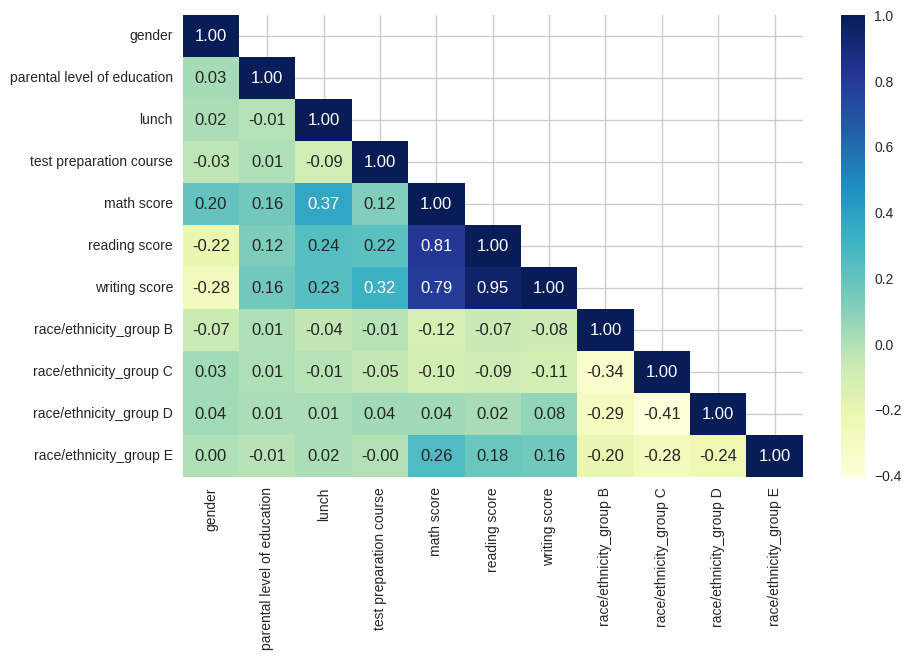

In [57]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),fmt='.2f', cmap="YlGnBu", annot=True, mask=np.triu(df.corr(),+1))
plt.show()

<Axes: xlabel='writing score', ylabel='Count'>

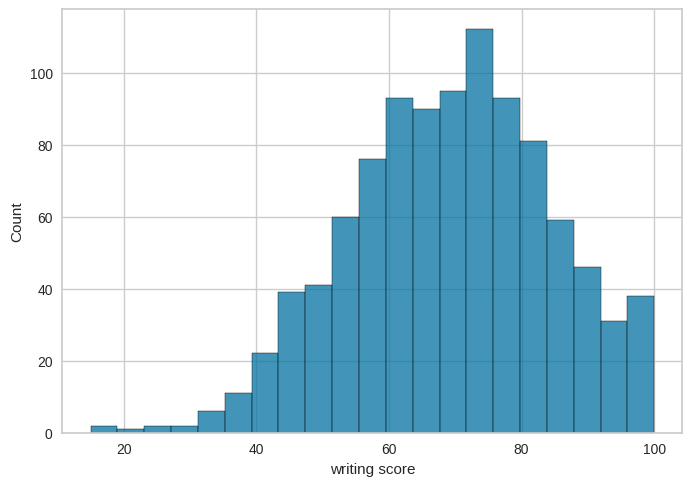

In [58]:
#creating hisplot/histogram for the writing score column
sns.histplot(x ='writing score', data = df)

In [59]:
# Performing feature scaling on the data 
from sklearn.preprocessing import StandardScaler
new_df_S = df
scaler = StandardScaler()
scaler.fit(df)
scaled_data = pd.DataFrame(scaler.transform(new_df_S),columns= new_df_S.columns )
scaled_data.head(5)

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,-1.016130,0.802955,0.717741,1.380933,-0.577987,-0.027092,0.589943,-0.496873,-0.690728,1.700309,-0.408486
1,0.984126,0.802955,0.717741,-0.724148,1.849426,1.604073,1.189208,-0.496873,-0.690728,1.700309,-0.408486
2,-1.016130,0.802955,-1.393261,-0.724148,-0.709198,0.398430,0.523358,-0.496873,-0.690728,1.700309,-0.408486
3,0.984126,0.802955,-1.393261,-0.724148,0.143677,-0.027092,-0.408832,2.012587,-0.690728,-0.588128,-0.408486
4,-1.016130,0.802955,0.717741,-0.724148,0.996551,1.036711,1.122623,-0.496873,-0.690728,1.700309,-0.408486


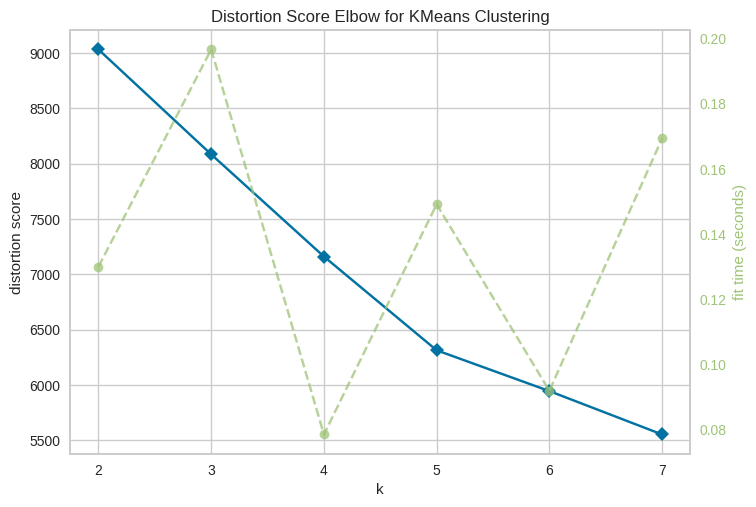

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
#Performing clustering analysis and visualizing the results
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,8))

visualizer.fit(scaled_data)
visualizer.show()

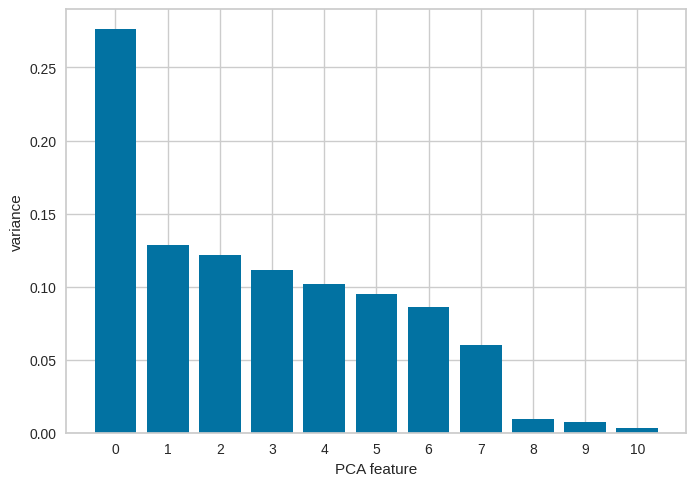

In [61]:
#performing principle component analysis
from sklearn.decomposition import PCA
PCA_date = scaled_data

pca = PCA()
pca.fit(PCA_date)
features = range(pca.n_components_)
data_pca = pca.transform(PCA_date)

plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

(1000, 6)


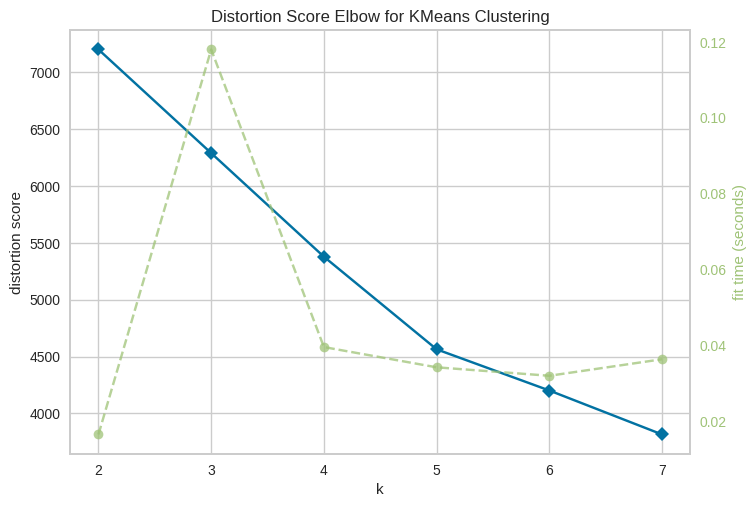

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
#performing additional PCA analysis on the previously scaled data
pca2 = PCA(n_components=6, svd_solver='full')
pca2.fit(PCA_date)
data_pca2 = pca2.transform(PCA_date)
print(data_pca2.shape)

km_all_PCA = KMeans(random_state=42)
visualizer_all_PCA = KElbowVisualizer(km_all_PCA, k=(2,8))
visualizer_all_PCA.fit(data_pca2)
visualizer_all_PCA.show()

 17%|█▋        | 1/6 [00:00<00:01,  2.95it/s]

Silhouetter Score: for 2 clusters is 0.1564942233162226


 33%|███▎      | 2/6 [00:00<00:01,  2.62it/s]

Silhouetter Score: for 3 clusters is 0.165826795679911


 50%|█████     | 3/6 [00:01<00:01,  1.74it/s]

Silhouetter Score: for 4 clusters is 0.18528658901457795


 67%|██████▋   | 4/6 [00:02<00:01,  1.50it/s]

Silhouetter Score: for 5 clusters is 0.2194599813609663


 83%|████████▎ | 5/6 [00:02<00:00,  1.56it/s]

Silhouetter Score: for 6 clusters is 0.21377102624260777


100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

Silhouetter Score: for 7 clusters is 0.20170420291910682


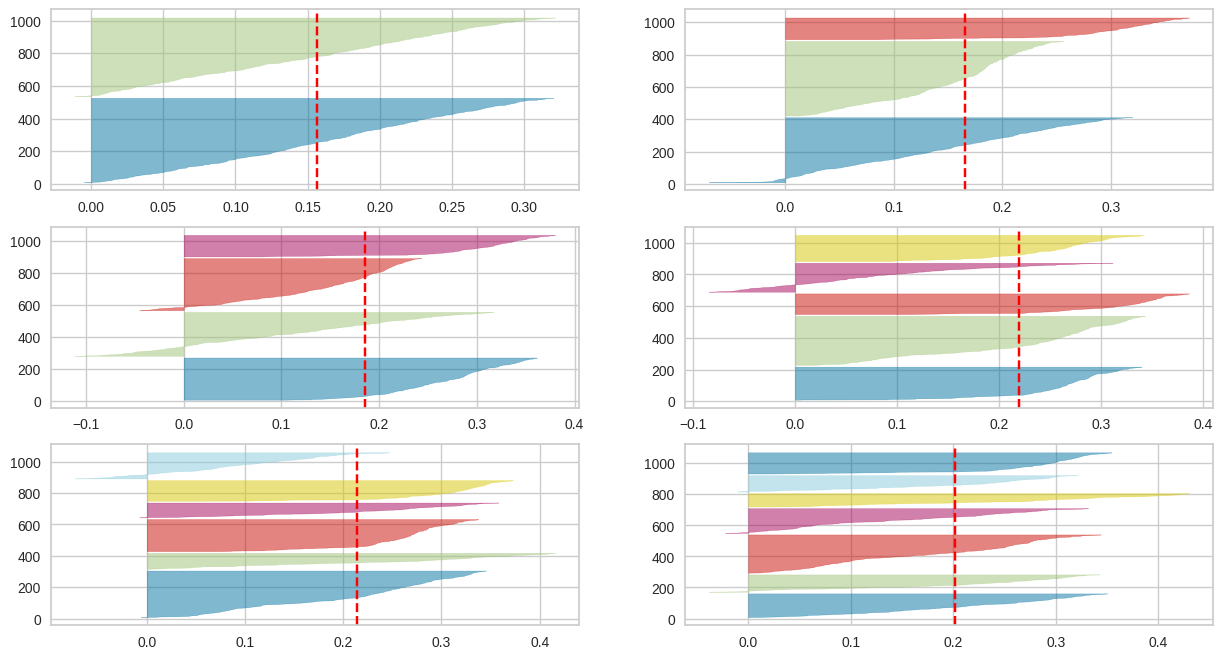

In [63]:
#Evaluating the quality of clustering for different numbers of clusters using the KMeans algorithm. The tqdm module is also used to display a progress bar during the loop.
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from tqdm import tqdm

fig, ax = plt.subplots(3, 2, figsize=(15,8))
K = [2, 3, 4, 5, 6, 7]
for i in tqdm(K):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=20, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_data)

    km.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, km.labels_, metric='euclidean')
    print(f'Silhouetter Score: for {i} clusters is {score}')

In [73]:
#performing clustering on the preprocessed data using the KMeans algorithm with 4 clusters
km = KMeans(n_clusters=4)
clusters = km.fit_predict(scaled_data)
df_1["clusters"] = clusters
df["clusters"] = clusters

In [65]:
#counting each cluster value
df["clusters"].value_counts()

0    399
1    260
2    198
3    143
Name: clusters, dtype: int64

<Axes: xlabel='clusters', ylabel='writing score'>

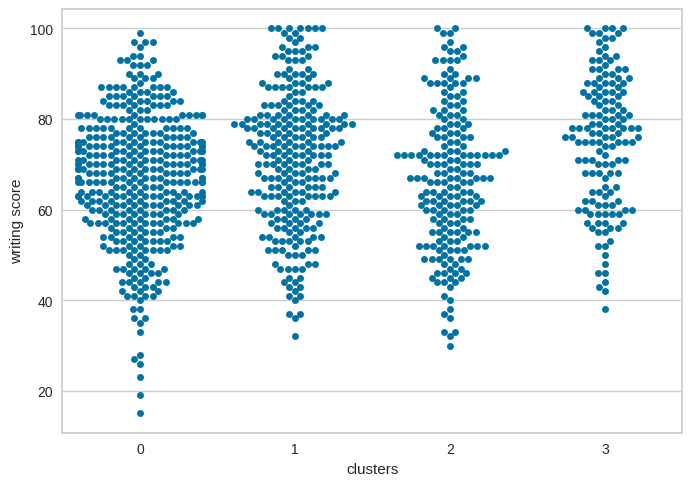

In [66]:
#creating a swarmplot for clusters against writing score
sns.swarmplot(data=df, x = 'clusters', y = 'writing score')

In [74]:
# calculating the average value of the 'writing score' column for each cluster
pvt_Clusters = round(df_1.pivot_table(index='clusters', aggfunc={'writing score':np.mean}))
pvt_Clusters = pvt_Clusters.reset_index()
pvt_Clusters

,clusters,writing score
0,0,52.0
1,1,78.0
2,2,72.0
3,3,77.0


   gender  writing score
0  female           73.0
1    male           65.0


<Axes: xlabel='gender', ylabel='writing score'>

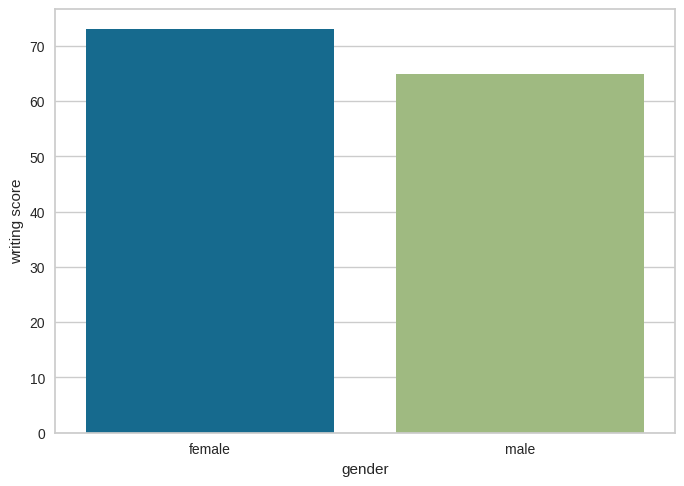

In [71]:
# calculating the average value of the 'writing score' column for each gender and creating a barplot for the same
pvt_gender = round(df_1.pivot_table(index='gender', aggfunc={'writing score':np.mean}))
pvt_gender = pvt_gender.reset_index()
print(pvt_gender)
sns.barplot(data=pvt_gender, x = 'gender', y = 'writing score')

  race/ethnicity  writing score
0        group A           68.0
1        group B           67.0
2        group C           67.0
3        group D           71.0
4        group E           75.0


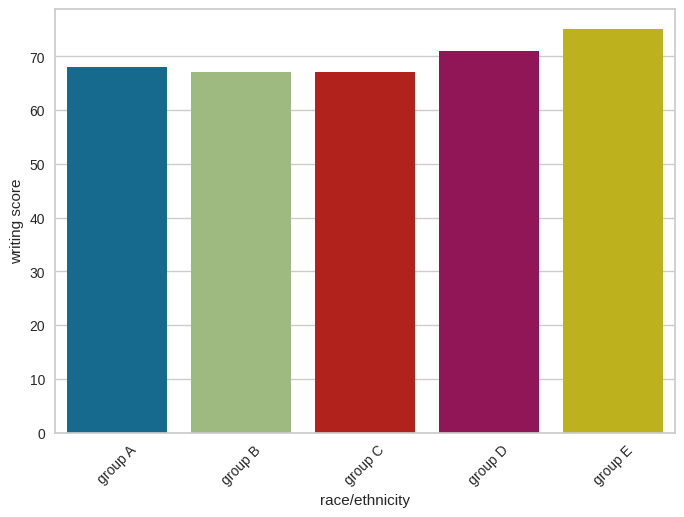

In [70]:
# calculating the average value of the 'writing score' column for ethnic group and creating a barplot for the same
pvt_ethnicity = round(df_1.pivot_table(index='race/ethnicity', aggfunc={'writing score':np.mean}))
pvt_ethnicity = pvt_ethnicity.reset_index()
print(pvt_ethnicity)
sns.barplot(data=pvt_ethnicity, x = 'race/ethnicity', y = 'writing score', ).tick_params(axis='x', rotation=45)

  parental level of education  writing score
0          associate's degree           72.0
1           bachelor's degree           72.0
2                 high school           67.0
3             master's degree           72.0
4                some college           69.0
5            some high school           65.0


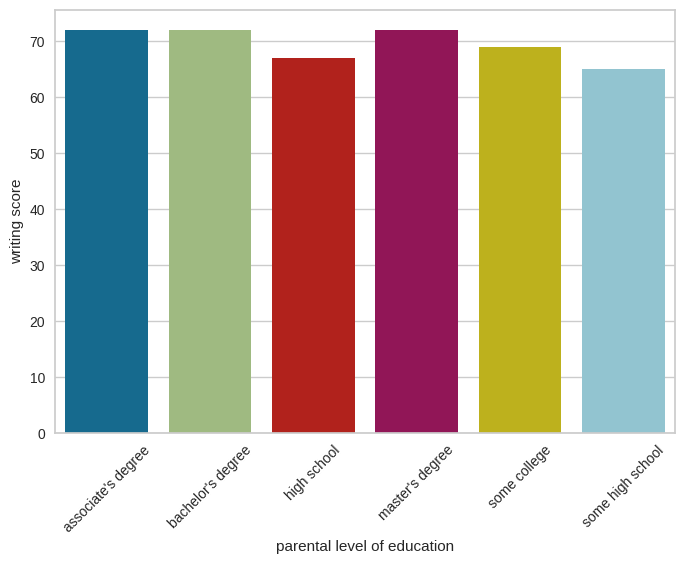

In [76]:
# calculating the average value of the 'writing score' column against parental level of education and creating a barplot for the same
pvt_education = round(df_1.pivot_table(index='parental level of education', aggfunc={'writing score':np.mean}))
pvt_education = pvt_education.reset_index()
print(pvt_education)
sns.barplot(data=pvt_education, x = 'parental level of education', y = 'writing score', ).tick_params(axis='x', rotation=45)

  test preparation course  writing score
0               completed           76.0
1                    none           66.0


<Axes: xlabel='test preparation course', ylabel='writing score'>

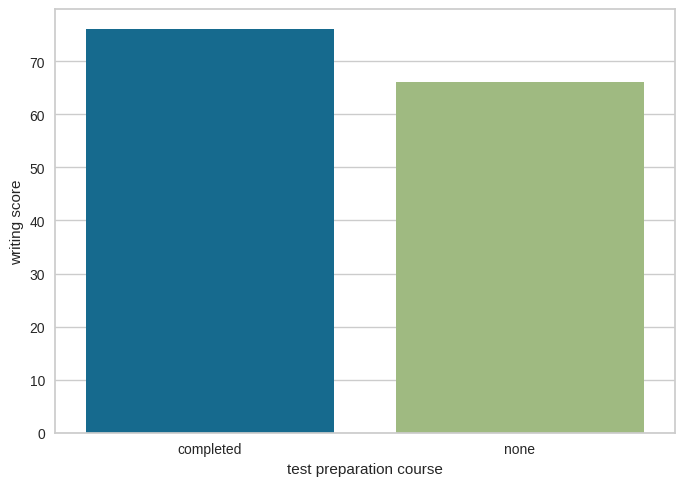

In [77]:
# calculating the average value of the 'writing score' column against test preparation course and creating a barplot for the same
pvt_test = round(df_1.pivot_table(index='test preparation course', aggfunc={'writing score':np.mean}))
pvt_test = pvt_test.reset_index()
print(pvt_test)
sns.barplot(data=pvt_test, x = 'test preparation course', y = 'writing score')